<a href="https://colab.research.google.com/github/Prashanth2902/PrashanthPrabhakar/blob/master/token_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical Regularities of Language

In this first homework assignment, you will familiarize yourself with some empirical regularities of natural language, Shannon entropy and Zipf's Law.

Read through this Jupyter notebook and fill in the parts marked with `TODO`. When you're ready to submit, print the notebook as a PDF and upload to Gradescope.

## Shannon Entropy

Shannon borrowed the concept of entropy from statistical physics to develop _information theory_, focused on encoding and compressing messages. A few years later, in 1950, he applied information theory to analyze human predictive ability—in other words, the entropy of the human language model. You can read the original article, [Prediction and Entropy of Printed English](https://languagelog.ldc.upenn.edu/myl/Shannon1950.pdf), for more details.

Your first task is to collect data on how predictable different letters are in an English sentence, depending on how much context in a word or sentence you have.

Go to the [Shannon game page](https://www.ccs.neu.edu/home/dasmith/courses/cs6120/shannon/) that we demonstrated in class. We already guessed part of Text 1, so work through Texts 2, 3, and 4.

In [ ]:
# TODO: Enter the arrays of numbers of guesses for Texts 2, 3, and 4 here.
import numpy as np
import pandas as pd
import math

word1 = [17, 1, 13, 1, 1, 1, 1, 1, 26, 1, 1, 1, 1, 2, 1, 1, 1, 1, 24, 1, 19, 4, 1, 1, 3, 1, 1, 1, 3, 2, 10, 1, 6, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1],
word2 = [1, 3, 1, 7, 4, 1, 3, 1, 11, 4, 8, 10, 7, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 24, 1, 25, 2, 1, 1, 7, 9, 10, 23, 1, 15, 1, 3, 15, 1, 27, 25, 6, 1, 17, 1, 18, 8, 6, 1, 1, 1, 14, 3, 13, 1]
word3 = [8, 2, 8, 1, 1, 25, 14, 1, 1, 1, 1, 1, 1, 1, 1, 15, 2, 1, 1, 9, 1, 1, 1, 1, 16, 1, 5, 9, 13, 3, 1, 1, 16, 1, 14, 1, 1, 1, 1, 10, 25, 26, 18, 1, 14, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

57


Rearrange the guess data into a two-dimensional array, relating number of characters of context (0, 1, 2, ...) to number of guesses required.

In other words, you might look in cell (2, 1) and read "2" if the number of times it took one guess to get the right letter with two characters of context was 2.

In [79]:
# TODO: Create array of counts of guesses. Print out the array so we can see it.
all_words = [word1, word2, word3]

max_context = max(len(w) for w in all_words)
num_guess_options = 28

counts = np.zeros((max_context, num_guess_options), dtype=int)

for word in all_words:
    for context, num_guesses in enumerate(word):
        counts[context, num_guesses] += 1

print("Shape of the counts array:", counts.shape)
print("Output Array:")
print(counts)

Shape of the counts array: (67, 28)
Output Array:
[[0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


Now you can compute Shannon's upper and lower bounds on the entropy of your predictive distribution for English. The upper bound, as a function of the number of context characters $N$, is just the Shannon entropy of the distribution of numbers of guesses. In other words, it's the entropy of the original text as &ldquo;reduced&rdquo; by the human encoder to a sequence of numbers of guesses.

$F_N = -\sum_{i=1}^{27} q_i^N \log_2 q_i^N$

where $q_i^N$ is the number of times you took $i$ guesses with $N$ characters of context, i.e., one of the cells in the table you computed. The number of guesses ranges from 1 to 27 since we restrict ourselves to 26 letters plus space. In computing entropy, we define $0 \log 0 = 0$.

In [78]:
# TODO: Compute the upper bound for each amount of context N and print it out.

upper_bounds = []

for N in range(counts.shape[0]):
    guess_counts_at_N = counts[N]

    # Sum these counts to get total number of observations for this context.
    total_observations = np.sum(guess_counts_at_N)

    if total_observations > 0:
        probabilities = guess_counts_at_N / total_observations
        non_zero_probs = probabilities[probabilities > 0]
        entropy = -np.sum(non_zero_probs * np.log2(non_zero_probs))
        upper_bounds.append(entropy)
        # Print the result for each context
        print(f"Context N={N} ({total_observations} observations): F_N = {entropy}")


Context N=0 (3 observations): F_N = 1.584962500721156
Context N=1 (3 observations): F_N = 1.584962500721156
Context N=2 (3 observations): F_N = 1.584962500721156
Context N=3 (3 observations): F_N = 0.9182958340544896
Context N=4 (3 observations): F_N = 0.9182958340544896
Context N=5 (3 observations): F_N = 0.9182958340544896
Context N=6 (3 observations): F_N = 1.584962500721156
Context N=7 (3 observations): F_N = -0.0
Context N=8 (3 observations): F_N = 1.584962500721156
Context N=9 (3 observations): F_N = 0.9182958340544896
Context N=10 (3 observations): F_N = 0.9182958340544896
Context N=11 (3 observations): F_N = 0.9182958340544896
Context N=12 (3 observations): F_N = 0.9182958340544896
Context N=13 (3 observations): F_N = 0.9182958340544896
Context N=14 (3 observations): F_N = -0.0
Context N=15 (3 observations): F_N = 0.9182958340544896
Context N=16 (3 observations): F_N = 1.584962500721156
Context N=17 (3 observations): F_N = -0.0
Context N=18 (3 observations): F_N = 0.91829583405

Shannon derived a lower bound on entropy from the guess data as

$\sum_{i=1}^{27} i(q_i^N - q_{i+1}^N) \log_2 i$

In [77]:
# TODO: Compute thew lower bound for each amount of context N and print it out.

i_vals = np.arange(1, 28)
log2_i_vals = np.log2(i_vals)

lower_bounds = []

for N in range(counts.shape[0]):
    guess_counts_at_N = counts[N]
    total_observations = np.sum(guess_counts_at_N)

    if total_observations > 0:
        probabilities = guess_counts_at_N / total_observations
        q_i = probabilities[1:]
        q_i_plus_1 = np.append(probabilities[2:], 0)
        diff = q_i - q_i_plus_1
        lower_bound = np.sum(i_vals * diff * log2_i_vals)
        lower_bounds.append(lower_bound)
        print(f"Context N={N} ({total_observations:d} observations): Lower Bound = {lower_bound}")

Context N=0 (3 observations): Lower Bound = 3.27846128228418
Context N=1 (3 observations): Lower Bound = 1.584962500721156
Context N=2 (3 observations): Lower Bound = 3.144893957592366
Context N=3 (3 observations): Lower Bound = 1.3805698166920966
Context N=4 (3 observations): Lower Bound = 1.0817041659455104
Context N=5 (3 observations): Lower Bound = 2.0191015756867827
Context N=6 (3 observations): Lower Bound = 2.6507133583785776
Context N=7 (3 observations): Lower Bound = 0.0
Context N=8 (3 observations): Lower Bound = 3.6498315944789823
Context N=9 (3 observations): Lower Bound = 1.0817041659455104
Context N=10 (3 observations): Lower Bound = 1.4495051818655913
Context N=11 (3 observations): Lower Bound = 1.5633186452976027
Context N=12 (3 observations): Lower Bound = 1.3805698166920966
Context N=13 (3 observations): Lower Bound = 0.6666666666666666
Context N=14 (3 observations): Lower Bound = 0.0
Context N=15 (3 observations): Lower Bound = 1.7667966751071091
Context N=16 (3 obse

## Zipf's Law

Now let's look at some text data directly to see the skewed distribution of tokens predicted by Zipf's Law. Recall that Zipf's law states that a word's rank (from the most common word at rank 1 on down) to its frequency is approximately a constant, i.e., $r \cdot f = k$. Equivalently, we can divide both sides by the total number of tokens $N$ to get $r \cdot P_r = c$, where $c = k/N$ and $P_r = f/N$ is the _relative frequency_ of word $r$.

We start by downloading a sample of 1000 open-access English books from [Project Gutenberg](https://gutenberg.org/).

In [76]:
# If your local environment doesn't have the wget command,
# you can comment this out and download it manually.
!wget "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"

--2025-09-19 00:29:00--  http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz
Resolving khoury.northeastern.edu (khoury.northeastern.edu)... 52.70.229.197
Connecting to khoury.northeastern.edu (khoury.northeastern.edu)|52.70.229.197|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150984197 (144M) [application/x-gzip]
Saving to: ‘pg-sample.json.gz.2’

pg-sample.json.gz.2 100%[===================>] 143.99M  95.6MB/s    in 1.5s    

2025-09-19 00:29:02 (95.6 MB/s) - ‘pg-sample.json.gz.2’ saved [150984197/150984197]



The file is compressed with gzip and is in a JSON lines format. Each line is one JSON record, which we parse with the `json` library.

Here we print out the keys in the first record: `id`, `author`, `title`, and `text`.

In [93]:
import gzip, json
for line in gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8"):
  rec = json.loads(line)
  print(rec.keys())
  print(rec['author'])
  print(rec['title'])
  print("---START---")
  x = rec['text'][0:100]
  print(x)
  print("---END---")
  break

dict_keys(['id', 'author', 'title', 'text'])
Jefferson, Thomas
The Declaration of Independence of the United States of America
---START---


This is a retranscription of one of the first Project
Gutenberg Etexts, offically dated December 3
---END---


Your task now is to **tokenize** the text in the `text` field of each record into an array of words. Later on in this course, we will discuss learning better tokenizers. For now, you should separate words on whitespace (space, newline, tab) and punctuation. Convert the tokens to lower case, and keep only those tokens that have at least one letter a-z in them. In general, numerals in text tend not to follow Zipf's law but [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law).

You might use _regular expressions_ (e.g., the `re.split` function) to help with tokenization and filtering.

After you have tokenized, compute $N$, the total number of tokens in the corpus and print it out.

In [96]:
# TODO: Compute an array of tokens in the corpus
# Compute the total number of tokens N and print it out.
import json
import re

all_tokens = []

try:
    for line in gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8"):
        records = json.loads(line)
        text = records['text']
        tokens = re.split(r'[^a-zA-Z]+', text)
        processed_tokens = [token.lower() for token in tokens if token]
        all_tokens.extend(processed_tokens)
        break
    N = len(all_tokens)
    print(f"Total number of tokens (N): {N}")
except Exception as e:
    print(f"An error occurred: {e}")

Total number of tokens (N): 5020


Now, count the frequency each unigram (distinct word) in the corpus and sort them in an array in descending order of frequency. The first item in your array should be the most common word. Print out that word and its frequency

In [97]:
# TODO: Compute an arrary of unigrams in descending order of frequency.
# Print the most common word and its frequency.
word_counts = {}

for word in all_tokens:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

most_common_word = max(word_counts, key=word_counts.get)
frequency = word_counts[most_common_word]
print(f"Most common word -> '{most_common_word}', frequency -> {frequency:,}.")

Most common word -> 'the', frequency -> 437.


Now, you can look at the Zipf's law relationship between rank and relative frequency (i.e., frequency divided by $N$). Plot the data using a python graphing package such as matplotlib, plotly, or plotnine. This doesn't have to be a fancy graph, so use whatever you're familiar with. Both axes should be on a log scale. If your package doesn't support log scales, you can take the log of the rank and relative frequency yourself before plotting. Recall that since python arrays are zero-indexed, the rank 1 word will be element 0 of your sorted array.


Step 2: Counting unigram frequencies...
-> Found 1,077 unique words.

Step 3: Preparing data for plotting...
-> Plotting data is ready.

Step 4: Generating the plot...
-> Plot successfully generated'.


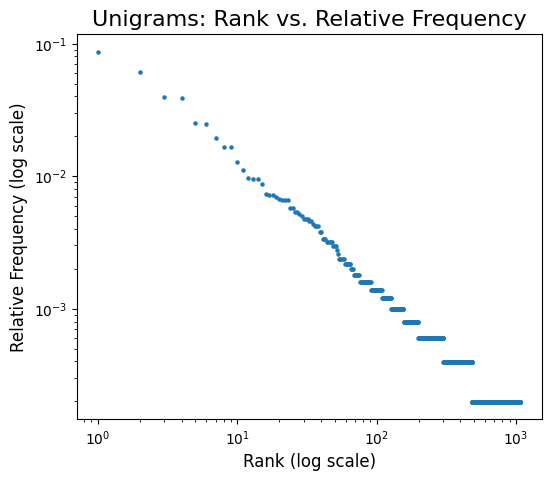

In [108]:
# TODO: Plot rank vs. relative frequency of unigrams.
import matplotlib.pyplot as plt
try:
    # --- Part 2: Count Unigram Frequencies ---
    print("\nStep 2: Counting unigram frequencies...")

    unigram_counts = {}
    for word in all_tokens:
        unigram_counts[word] = unigram_counts.get(word, 0) + 1

    print(f"-> Found {len(unigram_counts):,} unique words.")

    # --- Part 3: Prepare data for plotting ---
    print("\nStep 3: Preparing data for plotting...")

    # Sort the dictionary by frequency (the count) in descending order
    # This gives us a list of (word, count) tuples, ordered by rank.
    sorted_unigrams = sorted(unigram_counts.items(), key=lambda item: item[1], reverse=True)

    # The rank is the position in the sorted list (from 1 onwards)
    ranks = len(sorted_unigrams)
    ranks = np.arange(1, len(sorted_unigrams) + 1)

    # The relative frequency is the word's count divided by the total number of tokens
    relative_frequencies = np.array([count for word, count in sorted_unigrams]) / N

    print("-> Plotting data is ready.")

    # --- Part 4: Create the plot ---
    print("\nStep 4: Generating the plot...")

    plt.figure(figsize=(6, 5))

    # Using a scatter plot is better for visualizing all individual word ranks
    plt.scatter(ranks, relative_frequencies, s=5) # s is the marker size

    # Set both axes to a logarithmic scale
    plt.xscale('log')
    plt.yscale('log')

    # Add labels, title, and a grid for readability
    plt.title("Unigrams: Rank vs. Relative Frequency", fontsize=16)
    plt.xlabel("Rank (log scale)", fontsize=12)
    plt.ylabel("Relative Frequency (log scale)", fontsize=12)

    print(f"-> Plot successfully generated'.")
except Exception as e:
    print(f"An error occurred: {e}")

Now, take your array of tokens and compute the counts of both the bigrams and trigrams and sort them in descending order of frequency. Print out the most common bigram and trigram.

In [ ]:
# TODO: Compute sorted bigram and trigram statistics.
# Print out the most common bigram and trigram.
# Plot rank vs. relative frequency for bigrams and trigrams.
# You may make separate plots or put them on the same plot and label them.

**TODO**: Finally, write your visual impressions of the fit of the unigram, bigram, and trigram distributions. This doesn't need to be statistically rigorous.